In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
car=pd.read_csv("D:\\MLProjects\\Datasets\\car.csv")
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [3]:
car.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [6]:
car.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
car.dropna(inplace=True) #to remove null values

In [8]:
car.isna().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [10]:
# Remove 'Ask For Price' and 'onwards' from price and convert to int
car = car[car['Price'] != 'Ask For Price']
car['Price'] = car['Price'].str.replace('Rs.','').str.replace(',','').astype(int)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6736\415045280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Price'] = car['Price'].str.replace('Rs.','').str.replace(',','').astype(int)


In [11]:
car['Price'].unique

<bound method Series.unique of 0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
883    270000
885    110000
886    300000
888    260000
889    390000
Name: Price, Length: 816, dtype: int64>

In [12]:
# Clean 'kms_driven' column
car['kms_driven'] = car['kms_driven'].str.replace(' kms','').str.replace(',','')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6736\286967966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven'] = car['kms_driven'].str.replace(' kms','').str.replace(',','')


In [13]:
car['kms_driven'].unique

<bound method Series.unique of 0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 816, dtype: object>

In [14]:
# Remove rows with non-numeric 'kms_driven'
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)


In [15]:
car['kms_driven'].unique

<bound method Series.unique of 0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 816, dtype: int64>

In [16]:
car['year'].unique

<bound method Series.unique of 0      2007
1      2006
3      2014
4      2014
6      2012
       ... 
883    2011
885    2009
886    2009
888    2018
889    2013
Name: year, Length: 816, dtype: object>

In [17]:
car['year'] = car['year'].astype(int)


In [18]:
car['year'].unique

<bound method Series.unique of 0      2007
1      2006
3      2014
4      2014
6      2012
       ... 
883    2011
885    2009
886    2009
888    2018
889    2013
Name: year, Length: 816, dtype: int64>

In [19]:
# Take only the first word of the car name as brand
car['name'] = car['name'].str.split().str[0]

In [20]:
car['name']

0       Hyundai
1      Mahindra
3       Hyundai
4          Ford
6          Ford
         ...   
883      Maruti
885        Tata
886      Toyota
888        Tata
889    Mahindra
Name: name, Length: 816, dtype: object

In [25]:
#  Convert categorical columns to numeric using One-Hot Encoding
car_encoded = pd.get_dummies(car, drop_first=True)

In [26]:
car_encoded

,year,Price,kms_driven,name_BMW,name_Chevrolet,name_Datsun,name_Fiat,name_Force,name_Ford,name_Hindustan,...,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_LPG,fuel_type_Petrol
0,2007,80000,45000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2006,425000,40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2014,325000,28000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2014,575000,36000,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,2012,175000,41000,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2011,270000,50000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
885,2009,110000,30000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
886,2009,300000,132000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
888,2018,260000,27000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [28]:
#  Split dataset
X = car_encoded.drop('Price', axis=1)
y = car_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
#  Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [30]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R2 Score: 0.18776549825650102
Mean Squared Error: 454191243268.9025


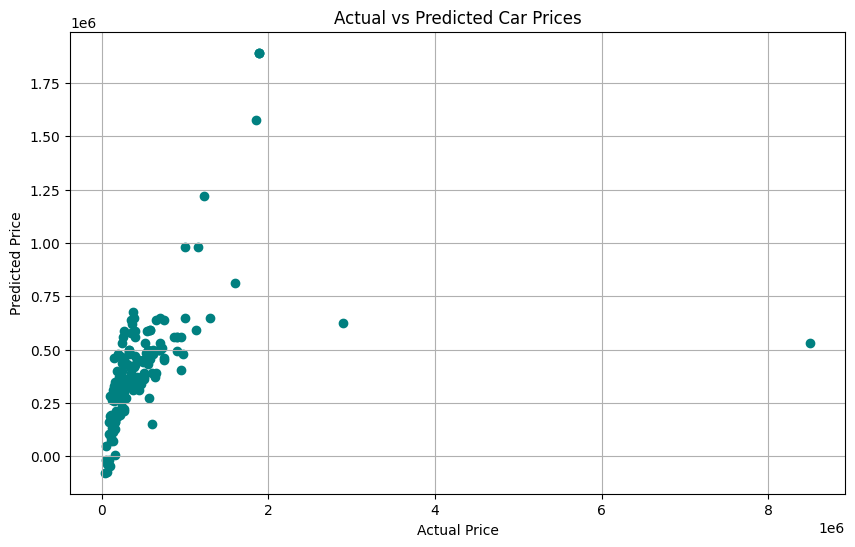

In [31]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='teal')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()
